# 1. MNE + LDA

This tutorial will demonstrate the use of Python MNE, a library for analyzing EEG/EOG/EMG signals.  This tutorial will also cover simple preprocessing flow of EEG and a simple model of LDA (Linear Discriminant Analysis) to classify motor imagery action.   

In [1]:
import os

import mne
from mne.io import concatenate_raws, read_raw_fif

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)

### Step 1. Loading the dataset

This step will vary across the source of dataset.  See Tutorial 0. for the source of this dataset.

In [2]:
#define where is the data path
path = "data"

In [3]:
#list all the files in the dir
files = os.listdir(path)
#files

In [4]:
#construct paths for all files
data_path = []
for f in files:
    if f.endswith((".fif")):
        file = os.path.join(path,f)
        data_path.append(file)

In [5]:
#loop each file in the data_path, and combine them into a raw mne object
raw = concatenate_raws([read_raw_fif(f, preload=True) for f in data_path])

Opening raw data file data/19-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/26-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/36-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/44-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/54-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/62-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/72-raw.fif...

    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/81-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/91-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/38-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/28-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/101-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/17-raw.fif...
    Range : 0 ... 96734 =      0.000 ..

Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/15-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/33-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/23-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/51-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...
Opening raw data file data/41-raw.fif...
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Reading 0 ... 96734  =      0.000 ...   386.936 secs...


In [6]:
#copy it, just in case we want to use it again
raw_data = raw.copy()

#### The Info data structure

Python MNE keeps all the metadata inside the <code>info</code> dictionary. 

As you can see, the Info object keeps track of a lot of information about:

- the recording system (gantry angle, HPI details, sensor digitizations, channel names, …)
- the experiment (project name and ID, subject information, recording date, experimenter name or ID, …)
- the data (sampling frequency, applied filter frequencies, bad channels, projectors, …)

In [7]:
#https://mne.tools/dev/auto_tutorials/intro/30_info.html
raw_data.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG, 3 EOG, 1 STIM
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 26
 projs: []
 sfreq: 250.0 Hz
>

In [8]:
#you can print each of the key of the meta data like this
print(raw_data.info['ch_names'])

['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz', 'EOG1', 'EOG2', 'EOG3', 'stim']


#### Obtaining a subset of channels

As you can see we got many EEG channels, along with some EOG (eye) as well as the stim (stimuli data).  We can tell MNE to ignore some channels using <code>pick_channels</code>, or <code>pick_types</code>, or <code>pick_channels_regexp</code>.  For more, read https://mne.tools/dev/auto_tutorials/intro/30_info.html.   For many channels, it is easier to just use <code>pick_types</code> so I will be using it.

In [9]:
picks = mne.pick_types(raw_data.info, meg=False, eeg=True, stim=False, eog=False,
                       exclude='bads')
picks  #notice it picks only the EEG channels which is the first 21 channels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

#### Working with sensor locations

Montages contain sensor positions in 3D (x, y, z in meters), which can be assigned to existing EEG/MEG data. By specifying the locations of sensors relative to the brain, Montages play an important role in computing the forward solution and inverse estimates.  To do this is very simple with MNE:

In [10]:
#first define the mapping we will use; 10-20 is a very typical mapping
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
print(ten_twenty_montage)  #returns a montage object

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


In [11]:
#last, simply apply the montage using set_montage
raw_data = raw_data.set_montage(ten_twenty_montage)

#### Plotting

MNE comes with many nice plots.  We will start with the PSD (power spectral density) plot by simply call <code>plot_psd</code>

Effective window size : 8.192 (s)


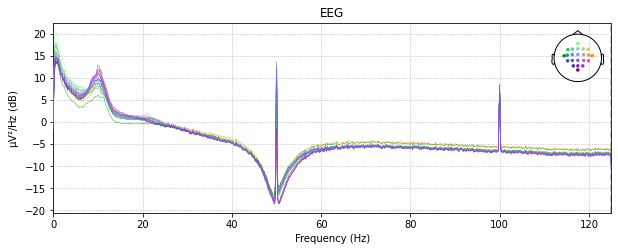

In [12]:
raw_data.plot_psd();  #put semicolon to remove double plots

### Step 2. Preprocessing

In this step, we will perform some basic preprocessing to remove well-known noises such as drift (low frequencies) and power line noise.

#### Power line noise

Power-line noise is a noise created by the electrical network. It is composed of sharp peaks at 50Hz (or 60Hz depending on your geographical location). Some peaks may also be present at the harmonic frequencies, i.e. the integer multiples of the power-line frequency, e.g. 100Hz, 150Hz, … (or 120Hz, 180Hz, …).

Looking from our PSD plot, it's clear that 50Hz, 100Hz are power line noise.  To remove, we perform a <code>notch_filter</code>

In [13]:
raw_data.notch_filter(np.arange(50, 125, 50))  #125 is the Nyquist frequency which is half our sample rate (i.e. 250)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)



<Raw | 19-raw.fif, 26 x 10447380 (41789.5 s), ~2.02 GB, data loaded>

Effective window size : 8.192 (s)


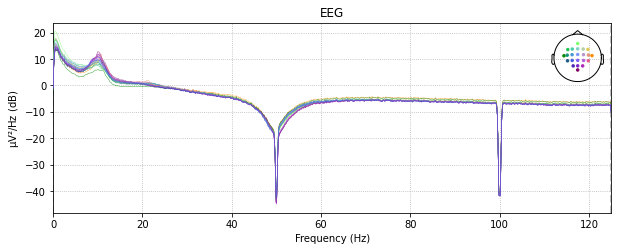

In [14]:
#plot again to make sure
raw_data.plot_psd();  #put semicolon to remove double plots

#### Bandpass filter

Normal brain frequency lies around 4 to 40hz.  It is also good practice to remove very low frequency (e.g., 0.1Hz) which are commonly electrical drifts.  It is also good to remove anything more than 40 since they are mostly muscle artifacts.

In [15]:
raw_data.filter(l_freq=4, h_freq=40)

Filtering raw data in 108 contiguous segments
Setting up band-pass filter from 4 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (1.652 sec)



<Raw | 19-raw.fif, 26 x 10447380 (41789.5 s), ~2.02 GB, data loaded>

Effective window size : 8.192 (s)


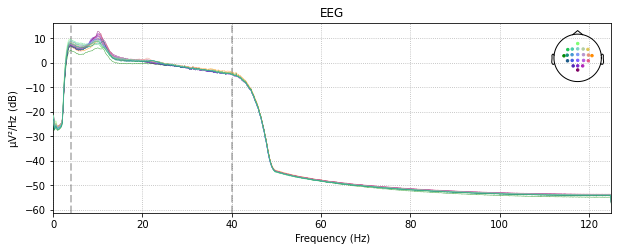

In [16]:
#plot again to see the changes
raw_data.plot_psd();

### Step 3. Epoching

In this step, we need to associate each event with the EEG.  Let's look how many events (i.e., classes/targets) we have in our dataset.

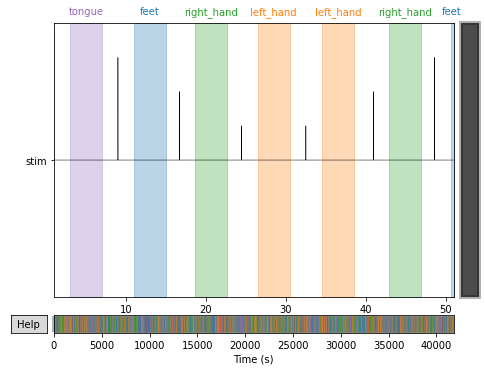

In [17]:
copy_raw_data = raw_data.copy()
copy_raw_data.pick_types(stim=True).plot(start=1, duration=50);  #copy so that it won't overwrite

Here we can see that we have four distinct events: (1) tongue imagery, (2) feet imagery, (3) right hand imagery, and (4) left hand imagery.   To get these four events, we can do like this:

In [18]:
events, event_dict = mne.events_from_annotations(raw_data)
print(events)
'''
The first column contains the event time in samples and the third column contains the event id. 
For output = ‘onset’ or ‘step’, the second column contains the value of the stim channel immediately 
before the event/step. For output = ‘offset’, the second column contains the value of the stim channel 
after the event offset.
'''

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
[[     750        0        4]
 [    2753        0        1]
 [    4671        0        3]
 ...
 [10441729        0        2]
 [10443843        0        3]
 [10445902        0        2]]


'\nThe first column contains the event time in samples and the third column contains the event id. \nFor output = ‘onset’ or ‘step’, the second column contains the value of the stim channel immediately \nbefore the event/step. For output = ‘offset’, the second column contains the value of the stim channel \nafter the event offset.\n'

#### Epoching

Epoching is a process of extracting only the relevant EEG data when the event happens.  Here we shall extract 0.5 - 2.5 seconds after the event starts.  Here we choose 0.5 - 2.5 seconds because we knew that the motor imagery took a total of 3 seconds (http://www.bbci.de/competition/iv/desc_2a.pdf), thus we decided to take the middle part.

In [31]:
#define the parameters
tmin, tmax = 0.5, 2.5

In [32]:
#called mne.Epochs to create epochs
epochs = mne.Epochs(raw_data, events, event_dict, tmin, tmax, proj=True, picks=picks,
                baseline=None,preload=True)

Not setting metadata
Not setting metadata
5184 matching events found
No baseline correction applied
0 projection items activated
Loading data for 5184 events and 501 original time points ...
0 bad epochs dropped


### Step 4: Visualizing epochs

Let's visualize the epochs to see whether there are any visible-to-the-eye differences between epochs.  We will plot both the time-based plot as well as frequency plot.

In [33]:
epoch_tongue = epochs['tongue'].average()
epoch_feet = epochs['feet'].average()
epoch_right_hand = epochs['right_hand'].average()
epoch_left_hand = epochs['left_hand'].average()

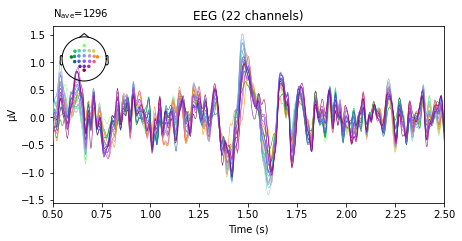

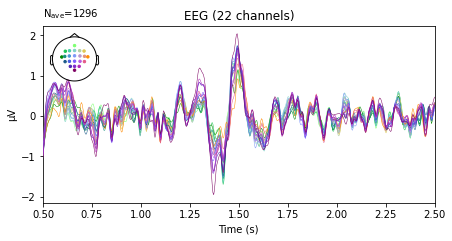

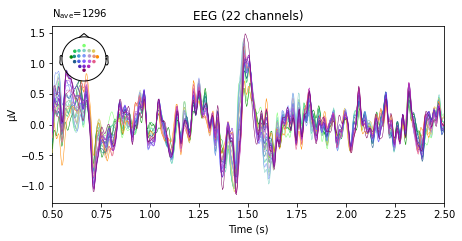

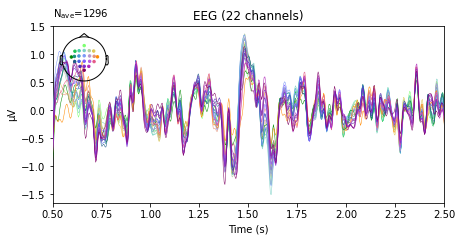

In [34]:
epoch_tongue.plot(spatial_colors=True, time_unit='s');
epoch_feet.plot(spatial_colors=True, time_unit='s');
epoch_right_hand.plot(spatial_colors=True, time_unit='s');
epoch_left_hand.plot(spatial_colors=True, time_unit='s');

For easier comparision, we can overlay them using <code>plot_compare_evokeds</code>:

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


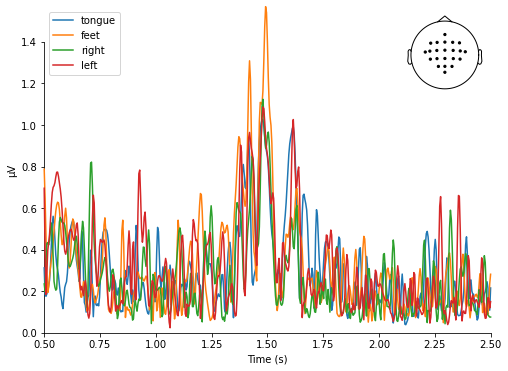

[<Figure size 576x432 with 2 Axes>]

In [35]:
mne.viz.plot_compare_evokeds(dict(tongue=epoch_tongue, feet=epoch_feet, right=epoch_right_hand, left=epoch_left_hand),
                             legend='upper left', show_sensors='upper right')

It seems there are certainly some differences in the time as they are not exactly overlapped.  This informs us that temporal-based model may help.  Let's look at the frequency.

    Using multitaper spectrum estimation with 7 DPSS windows


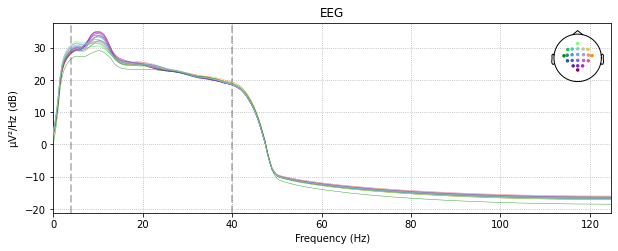

    Using multitaper spectrum estimation with 7 DPSS windows


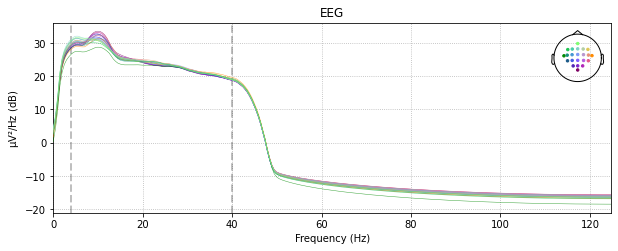

    Using multitaper spectrum estimation with 7 DPSS windows


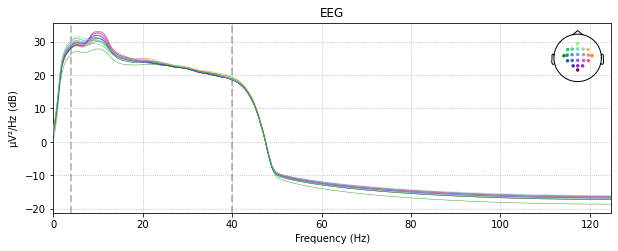

    Using multitaper spectrum estimation with 7 DPSS windows


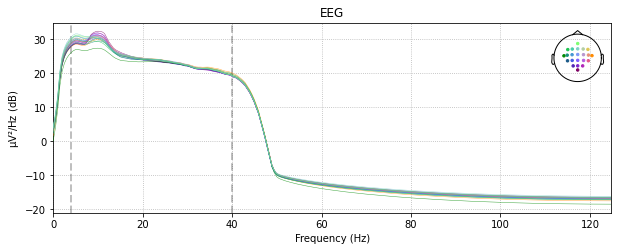

In [36]:
epochs['tongue'].plot_psd();
epochs['feet'].plot_psd();
epochs['right_hand'].plot_psd();
epochs['left_hand'].plot_psd();

It is really difficult to see the PSD by bare eyes.  We can also use <code>plot_psd_topomap()</code> to plot each of the band frequency and see whether there are any differences.  (Note that if you want to view different frequency bands than the defaults (beta, etc.), you can use <code>bands</code> parameter which takes a list of tuples

    Using multitaper spectrum estimation with 7 DPSS windows


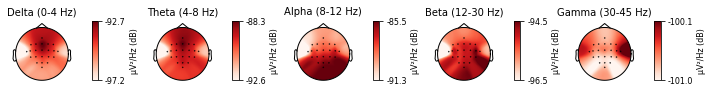

    Using multitaper spectrum estimation with 7 DPSS windows


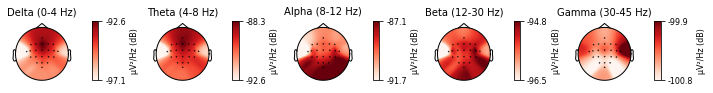

    Using multitaper spectrum estimation with 7 DPSS windows


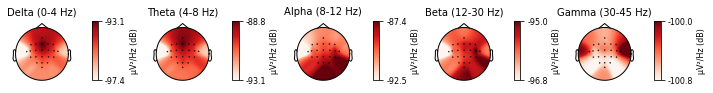

    Using multitaper spectrum estimation with 7 DPSS windows


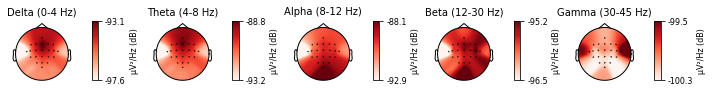

In [37]:
epochs['tongue'].plot_psd_topomap();
epochs['feet'].plot_psd_topomap();
epochs['right_hand'].plot_psd_topomap();
epochs['left_hand'].plot_psd_topomap();

### Step 5: Modeling

Let's get our X and y in numpy form. Here X should have shape of (batch, channels, and samples) and y should have shape of (batch, ).   For the required shape of data, we shall worry later on, depending on what deep learning libraries we use.

For calculate of samples, since we get 0.5 - 2.5 seconds, and our sampling rate is 250, thus the total sample is 2 * 250 = 500.

In [38]:
from mne.decoding import CSP, Scaler, Vectorizer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [39]:
X = epochs.get_data()
X2D = X.reshape((X.shape[0], -1))
y = epochs.events[:, -1]

print(X.shape)
print(X2D.shape)
print(y.shape)

(5184, 22, 501)
(5184, 11022)
(5184,)


In [40]:
#set up cross-validation
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(X)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
svm = SVC()
csp = CSP(n_components=22, reg=None, log=True) 
vec = Vectorizer()
scaler = Scaler(epochs.info)
gb = GradientBoostingClassifier()

# Assemble pipeline
csp_lda = Pipeline(steps=[("csp", csp), ("lda", lda)])   #0.4899
scaler_csp_lda = Pipeline(steps=[("scaler", scaler),("csp", csp), ("lda", lda)]) #0.4899
scaler_lda = Pipeline(steps=[("scaler", scaler),("vec", vec), ("lda", lda)]) #0.264

csp_svm = Pipeline(steps=[("csp", csp), ("svm", svm)])   #0.563
scaler_csp_svm = Pipeline(steps=[("scaler", scaler),("csp", csp), ("svm", svm)]) #0.563 (epoch 0.5, 0.25) (0.462-apply baseline -1,0)
scaler_svm = Pipeline(steps=[("scaler", scaler),("vec", vec), ("svm", svm)]) #took too long to run

csp_gb = Pipeline(steps=[("csp", csp), ("gb", gb)]) #0.547
scaler_csp_gb = Pipeline(steps=[("scaler", scaler),("csp", csp), ("gb", gb)]) # 0.479 (epoch -1, 4) #0.547 (epoch 0.5, 0.25) (0.456 apply baseline -1, 0)
scaler_gb = Pipeline(steps=[("scaler", scaler),("vec", vec), ("gb", gb)]) #took too long to run

# Cross-validation
score = cross_val_score(scaler_csp_svm, X, y, cv=cv, n_jobs=1)

Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 22 dim * 2.6e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 22 dim * 2.4e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 22 dim * 2.4e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 22 dim * 2.7e+10  max singular value)


Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 22 dim * 2.5e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 22 dim * 2.5e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 22 dim * 2.4e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 22 dim * 2.7e+10  max singular v

In [41]:
# Printing the results
# for n_component in range(0, 21):
# print(f"CV score: {np.mean(scores[n_component])} n_components: {n_component}")
print(f"CV score: {np.mean(score)}")

CV score: 0.5475409836065575


#### Gridsearch

Given our best model, let's further gridsearch and see whether there are any hyperparameters that can further improve the learning.